# Data Science Project - CODERSCAVE  
#                                                          - by Ananya Tiwari
_Problem Statement - The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities._


# Required Libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
import folium

In [3]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


***Uploading csv file***

In [4]:
Analysis = pd.read_csv('globalterrorismdb_0718dist.csv')
Analysis

C:\Users\ANANYA TIWARI\AppData\Local\Temp\ipykernel_25048\4220803643.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Analysis = pd.read_csv('globalterrorismdb_0718dist.csv')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Data Processing

In [5]:
Analysis.head() #.head() is used to show top above rows based on the desired parameter

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
Analysis.tail()  #.tail() is used to show top below rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
Analysis.shape  #Total number of rows and columns

(181691, 135)

In [8]:
Analysis.columns  #Returns all the column labels

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
Analysis.dtypes    #Used to see the datatype of all the columns in the dataset

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [10]:
Analysis.nunique()    #Shows total number of unique value from whole data frame

eventid         576
iyear            47
imonth           13
iday             32
approxdate     2244
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related       14306
Length: 135, dtype: int64

In [11]:
Analysis.describe()     #Shows the mean, median, count, etc from the whole dataset

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
Analysis.isnull()   #Shows number of null values

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [13]:
Analysis.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
region = Analysis['region_txt'].value_counts(normalize=True) * 100
region = region.reset_index()
region.rename(columns={'index': 'Region Name', 'region_txt': 'Percentage Of Incidents (%)'}, inplace=True)
region

,Region Name,Percentage Of Incidents (%)
0,Middle East & North Africa,27.780132
1,South Asia,24.753015
2,South America,10.445206
3,Sub-Saharan Africa,9.659257
4,Western Europe,9.157856
5,Southeast Asia,6.871557
6,Central America & Caribbean,5.693182
7,Eastern Europe,2.831180
8,North America,1.902131
9,East Asia,0.441409


In [15]:
print('Number of regions:', len(region))

Number of regions: 12


# What are the percentage of incidents in different regions?

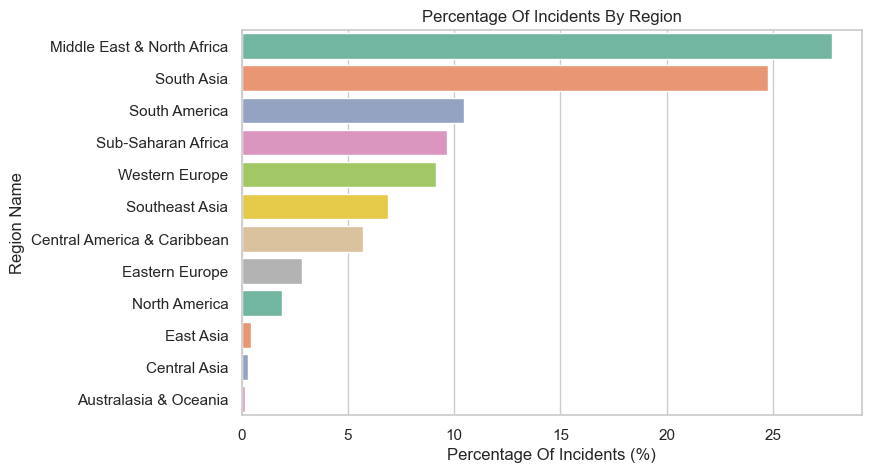

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=region,
              x='Percentage Of Incidents (%)',
              y='Region Name',
              orient='h',
              palette='Set2'
            )
plt.title('Percentage Of Incidents By Region')


plt.show()

In [17]:
region['Percentage Of Incidents (%)'][:2].sum()

52.53314693628192

# Top five countries with highest number of incidents

In [18]:
country = Analysis['country_txt'].value_counts()
country = country.reset_index()
country.rename(columns={'index': 'Country Name', 'country_txt': 'Number Of Incidents'}, inplace=True)
country.head()

,Country Name,Number Of Incidents
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [19]:
print('Number of countries:', len(country))

Number of countries: 205


# Top ten countries with highest number of incidents

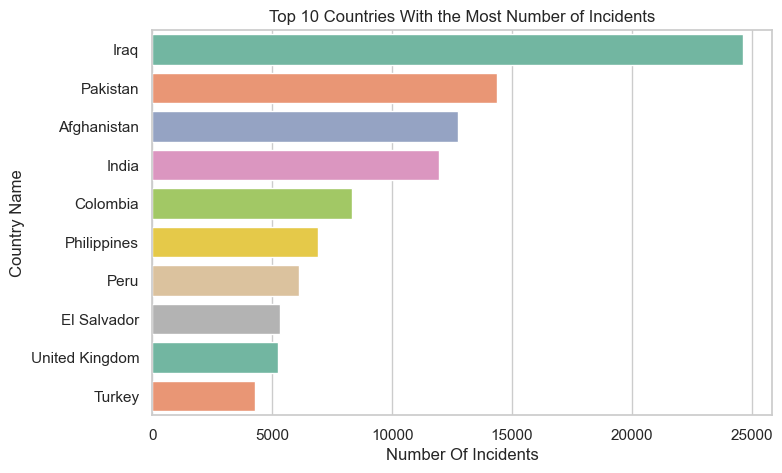

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(data=country[:10],
              x='Number Of Incidents',
              y='Country Name',
              orient='h',
              palette='Set2'
            )
plt.title('Top 10 Countries With the Most Number of Incidents')


plt.show()

In [21]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\ANANYA TIWARI\AppData\Local\Temp\ipykernel_25048\4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [22]:
world_merged = world.merge(country, left_on='name', right_on='Country Name', how='left')
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Number Of Incidents
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,17.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,59.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,96.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [23]:
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           26
Number Of Incidents    26
dtype: int64

In [24]:
world_merged['Number Of Incidents'].fillna(0, inplace=True)
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           26
Number Of Incidents     0
dtype: int64

# World Map showing the areas with higher rates of incidents:


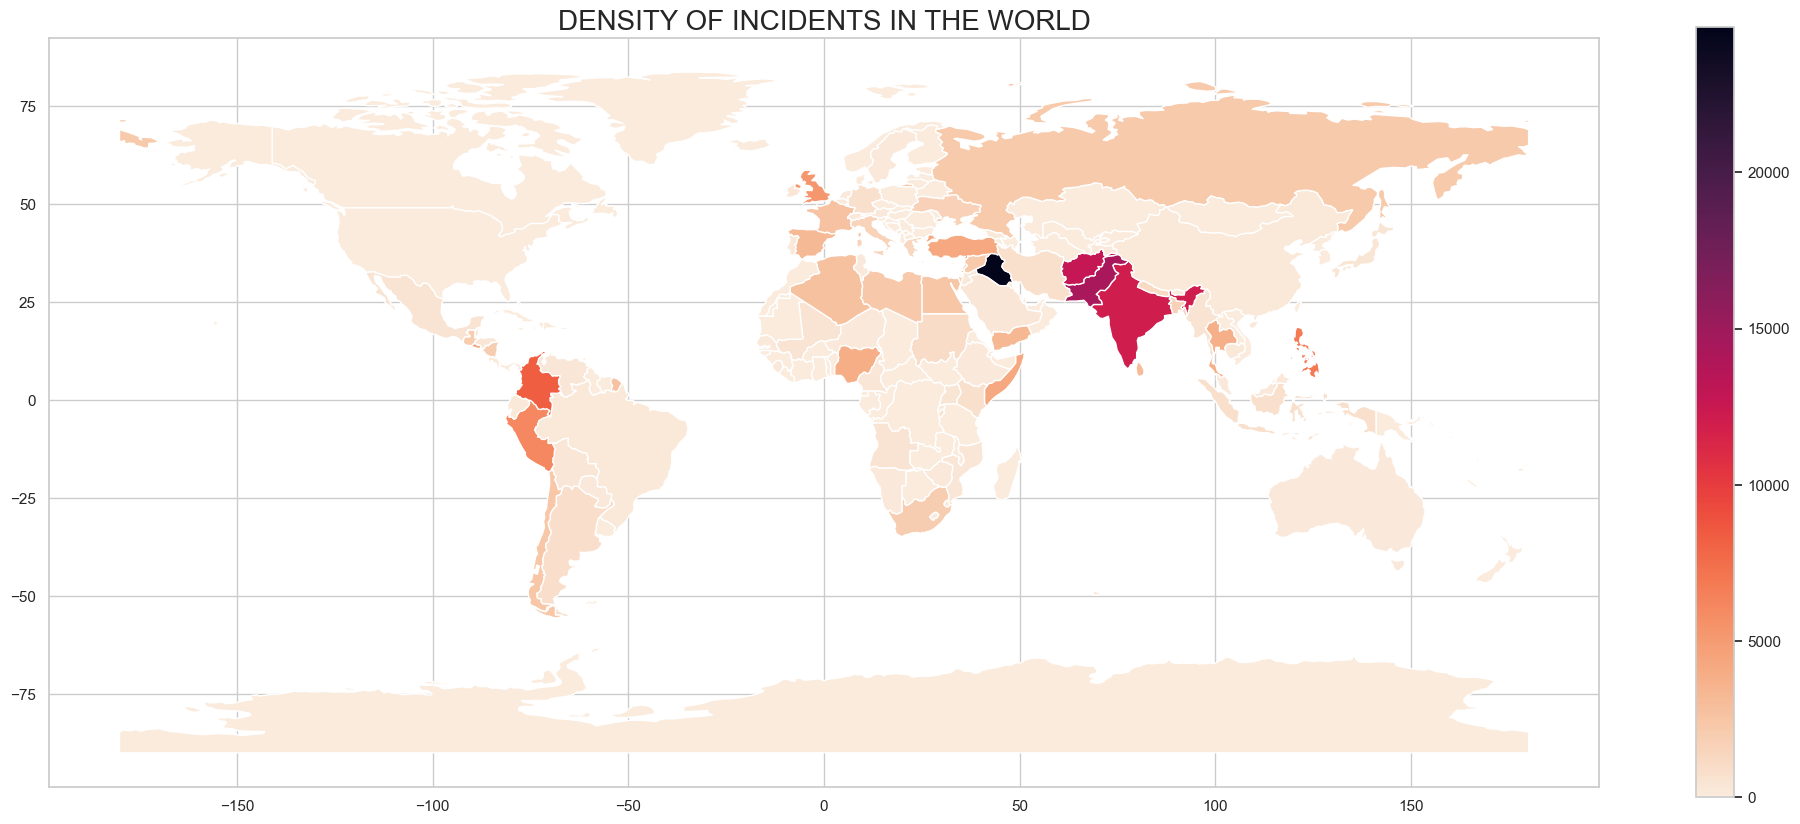

In [71]:
world_merged.plot('Number Of Incidents', cmap='rocket_r', legend=True, figsize=(25, 10))
plt.title('DENSITY OF INCIDENTS IN THE WORLD', fontsize=20)
plt.show()

*When looking at the above graph which is a density graph, the countries in the darker shade have more attack rates in comparision to others. Middle east have most darker countries, namely, Turkey, Iraq and Syria. Second darker areas are in Asia.*

# Who are most targeted by terrorists?

In [26]:
target_type = Analysis['targtype1_txt'].value_counts(normalize=True) * 100
target_type = target_type.reset_index()
target_type.rename(columns={'index': 'Target Type', 'targtype1_txt': 'Percentage Of Incidents (%)'}, inplace=True)
target_type

,Target Type,Percentage Of Incidents (%)
0,Private Citizens & Property,23.947801
1,Military,15.401974
2,Police,13.487735
3,Government (General),11.713844
4,Business,11.375907
5,Transportation,3.742068
6,Utilities,3.314969
7,Unknown,3.246171
8,Religious Figures/Institutions,2.443709
9,Educational Institution,2.378764


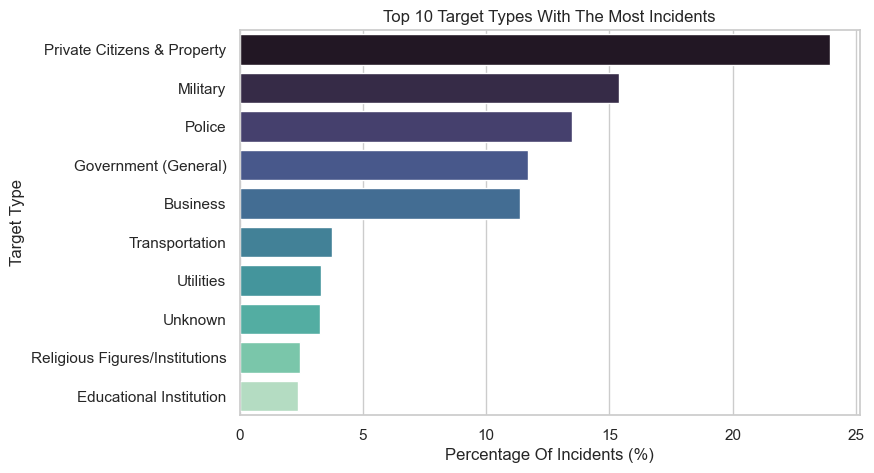

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_type[:10],
              x='Percentage Of Incidents (%)',
              y='Target Type',
              orient='h',
              palette='mako')
plt.title('Top 10 Target Types With The Most Incidents')


plt.show()

*From the above barplot we can clearly state that the most targeted are private citizens and military people.*

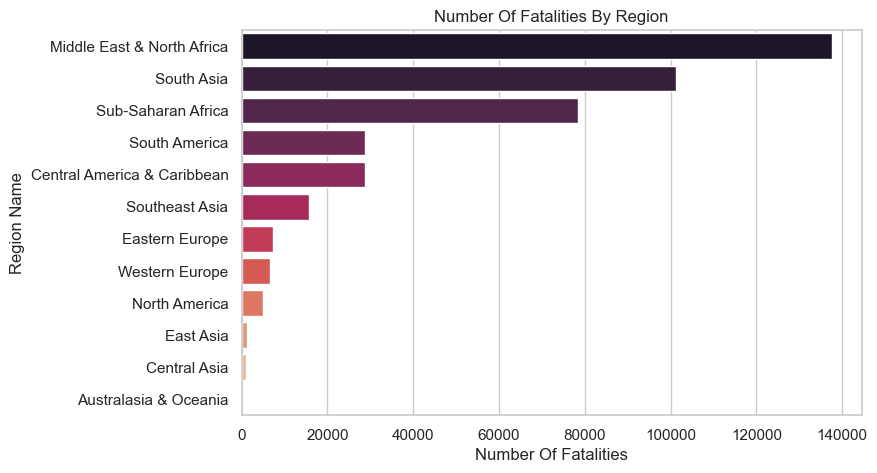

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths,
              x='Number Of Fatalities',
              y='Region Name',
              orient='h',
              palette='rocket')
plt.title('Number Of Fatalities By Region')


plt.show()
     

*From the above barplot, we can conclude that the region with most of the attacks are Middle East and North Africa, which is matching with our density graph as well.*

In [33]:
n_deaths_avg = Analysis.groupby('region_txt').mean().sort_values(by='nkill', ascending=False).reset_index()
n_deaths_avg.rename(columns={'region_txt': 'Region Name', 'nkill': 'Average Fatalities'}, inplace=True)
n_deaths_avg

C:\Users\ANANYA TIWARI\AppData\Local\Temp\ipykernel_25048\29389263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n_deaths_avg = Analysis.groupby('region_txt').mean().sort_values(by='nkill', ascending=False).reset_index()


,Region Name,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,Sub-Saharan Africa,2.007417e+11,2007.352137,6.474131,15.409858,0.096410,165.096068,11.0,0.481382,25.926515,...,4.903763e+05,2.291854e+05,1.664766e+05,-4.401460,5.159427,-43.795210,-3.508376,-3.408775,0.117151,-2.856296
1,Central America & Caribbean,1.984974e+11,1984.909126,6.488012,14.918600,0.014501,84.377804,2.0,13.955207,-9311.351226,...,4.921737e+05,0.000000e+00,4.123043e+04,13162.500000,3.257919,-0.763314,-3.565932,-3.553944,0.036446,-3.220998
2,Middle East & North Africa,2.008325e+11,2008.260352,6.459563,15.666323,0.040912,116.497385,10.0,32.671668,38.143342,...,5.533410e+06,1.849018e+06,2.362376e+06,-2.106383,4.914388,-36.373403,-5.438761,-5.299679,0.054464,-4.898027
3,South Asia,2.008698e+11,2008.633499,6.445124,15.573932,0.055943,91.549762,6.0,28.431264,74.223706,...,2.078918e+06,9.882802e+03,2.447216e+04,61.647799,4.794842,-27.404350,-4.956708,-4.909548,0.038800,-4.590074
4,Central Asia,2.000355e+11,2000.289520,6.539964,15.527531,0.065719,118.385435,7.0,40.807496,54.660976,...,1.337475e+06,0.000000e+00,-4.950000e+01,0.000000,4.297297,-16.516129,-7.500888,-7.465364,0.204263,-5.634103
5,South America,1.990428e+11,1990.361577,6.605543,15.479239,0.042997,84.291812,3.0,-7.947745,-73.088880,...,2.240667e+06,6.265512e+04,7.249081e+05,936.387097,3.733539,-13.405848,-2.937717,-2.906471,0.040784,-2.645273
6,East Asia,1.994881e+11,1994.815461,6.567332,16.299252,0.011222,93.586035,4.0,34.217494,122.075461,...,2.109800e+06,NaN,0.000000e+00,NaN,4.166667,16.181818,-5.990025,-5.971322,0.048628,-4.943890
7,Eastern Europe,2.007066e+11,2007.000583,6.595062,15.634914,0.038297,212.373056,9.0,46.090952,37.127127,...,3.216705e+06,-9.900000e+00,6.230236e+05,3627.363636,4.182979,-14.965217,-6.147162,-5.984059,0.088841,-5.030910
8,North America,1.986092e+11,1986.029225,6.251447,15.329572,0.015625,198.836806,1.0,34.479625,-92.928292,...,5.361789e+06,6.000000e+04,1.985611e+06,-99.000000,3.247312,-3.905405,-4.657118,-4.608796,0.087674,-4.108218
9,Southeast Asia,2.006643e+11,2006.578855,6.435483,15.518943,0.043572,166.012895,5.0,8.762561,113.901732,...,2.184447e+06,1.234563e+06,5.550324e+04,-6.187500,3.794157,-12.810848,-4.898438,-4.875611,0.030036,-4.679535


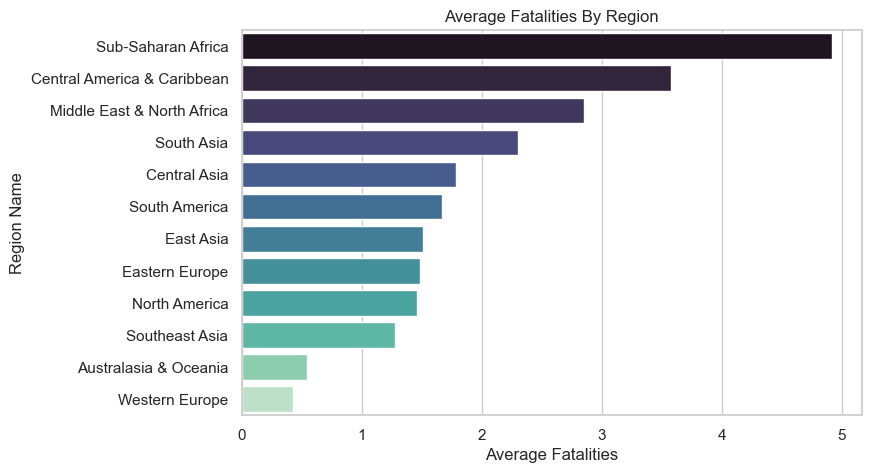

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths_avg,
              x='Average Fatalities',
              y='Region Name',
              orient='h',
              palette='mako')
plt.title('Average Fatalities By Region')


plt.show()

*The above barplot tells about the region which have average terrorist attacks.*

# What are the attack types with their percentage of usage?

In [35]:
attack_type = Analysis['attacktype1_txt'].value_counts(normalize=True) * 100
attack_type = attack_type.reset_index()
attack_type.rename(columns={'index': 'Attack Type', 'attacktype1_txt': 'Percentage Of Usage (%)'}, inplace=True)
attack_type

,Attack Type,Percentage Of Usage (%)
0,Bombing/Explosion,48.574228
1,Armed Assault,23.484377
2,Assassination,10.629035
3,Hostage Taking (Kidnapping),6.141196
4,Facility/Infrastructure Attack,5.699787
5,Unknown,4.004601
6,Unarmed Assault,0.558641
7,Hostage Taking (Barricade Incident),0.545432
8,Hijacking,0.362704


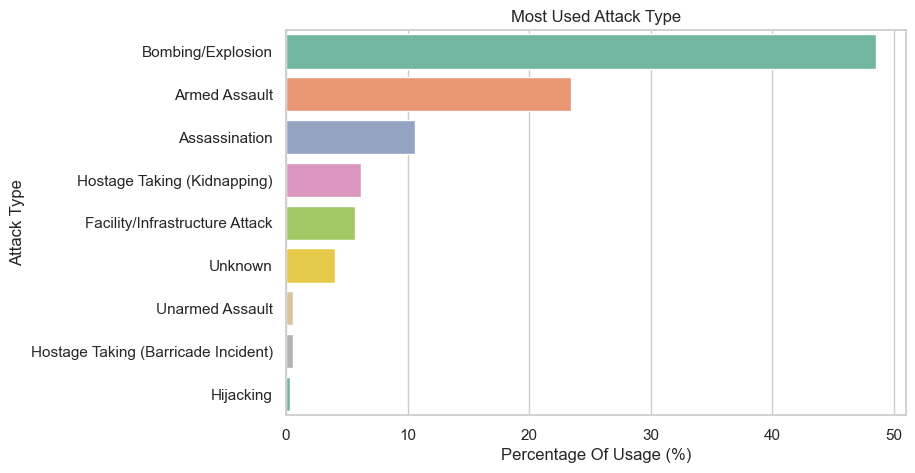

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=attack_type,
              x='Percentage Of Usage (%)',
              y='Attack Type',
              orient='h',
              palette='Set2')
plt.title('Most Used Attack Type')


plt.show()

*From above barplot, we can conclude that most used attack type is Bombing/Explosion and least used is Hijacking.*

In [47]:
df_2 = Analysis[['region_txt', 'targtype1_txt']].copy()
df_2.head()

,region_txt,targtype1_txt
0,Central America & Caribbean,Private Citizens & Property
1,North America,Government (Diplomatic)
2,Southeast Asia,Journalists & Media
3,Western Europe,Government (Diplomatic)
4,East Asia,Government (Diplomatic)


In [48]:
df_2['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [51]:
order_regions = ['North America', 'Central America & Caribbean', 'South America', 'Western Europe', 'Eastern Europe',
                 'Sub-Saharan Africa', 'Middle East & North Africa', 'Central Asia','South Asia', 'East Asia', 'Southeast Asia']

In [52]:
region_grouped = df_2.groupby(['region_txt'])['targtype1_txt'].value_counts(normalize=True) * 100
region_group_new = region_grouped.groupby(level=[0]).nlargest(5).rename('Percentage Incidents (%)').reset_index(level=[0, 2])
region_group_new = region_group_new.loc[order_regions].reset_index(drop=True) # rearrange order of regions and drop index
region_group_new

,region_txt,targtype1_txt,Percentage Incidents (%)
0,North America,Business,26.186343
1,North America,Private Citizens & Property,13.541667
2,North America,Government (General),11.979167
3,North America,Abortion Related,7.465278
4,North America,Police,6.799769
5,Central America & Caribbean,Military,29.630704
6,Central America & Caribbean,Private Citizens & Property,14.510828
7,Central America & Caribbean,Utilities,11.861949
8,Central America & Caribbean,Business,11.513921
9,Central America & Caribbean,Government (General),10.740526


In [53]:
region_group_new['Rank'] = region_group_new.groupby('region_txt')['Percentage Incidents (%)'].rank('min', ascending=False).astype(int)
region_group_new     

,region_txt,targtype1_txt,Percentage Incidents (%),Rank
0,North America,Business,26.186343,1
1,North America,Private Citizens & Property,13.541667,2
2,North America,Government (General),11.979167,3
3,North America,Abortion Related,7.465278,4
4,North America,Police,6.799769,5
5,Central America & Caribbean,Military,29.630704,1
6,Central America & Caribbean,Private Citizens & Property,14.510828,2
7,Central America & Caribbean,Utilities,11.861949,3
8,Central America & Caribbean,Business,11.513921,4
9,Central America & Caribbean,Government (General),10.740526,5


In [54]:
# create ranking table target types of each regions
ranking_table = region_group_new.pivot_table(index='Rank',
                                             columns='region_txt',
                                             values='targtype1_txt',
                                             aggfunc=','.join)
ranking_table = ranking_table[order_regions].copy()
ranking_table

region_txt,North America,Central America & Caribbean,South America,Western Europe,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Central Asia,South Asia,East Asia,Southeast Asia
Rank,,,,,,,,,,,
1,Business,Military,Business,Business,Military,Private Citizens & Property,Private Citizens & Property,Government (General),Private Citizens & Property,Transportation,Private Citizens & Property
2,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Police,Military,Military,Military,Police,Government (General),Military
3,Government (General),Utilities,Government (General),Government (General),Private Citizens & Property,Government (General),Police,Private Citizens & Property,Military,Business,Government (General)
4,Abortion Related,Business,Police,Police,Government (General),Police,Government (General),Police,Government (General),Police,Business
5,Police,Government (General),Utilities,Military,Business,Business,Business,Business,Business,Private Citizens & Property,Police


In [58]:
# filter out some necessary target types
region_group_new_filtered = region_group_new[region_group_new['targtype1_txt'].isin(['Private Citizens & Property', 'Business', 'Abortion Related','Militry','Transporation', 'Government(Diplomatic)'])]

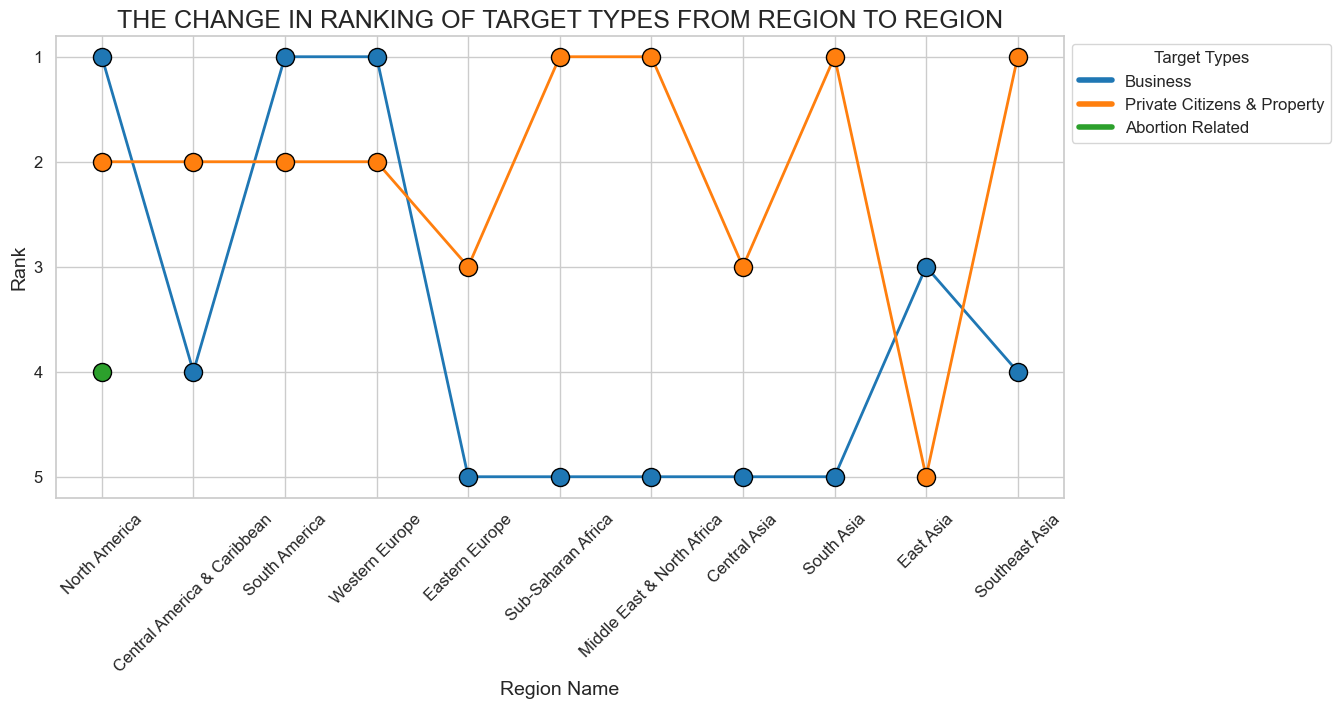

In [62]:
plt.figure(figsize=(13, 6))

sns.lineplot(data=region_group_new_filtered,
             x='region_txt',
             y='Rank',
             hue='targtype1_txt',
             marker='o',
             markersize=13,
             markeredgecolor='black',
             markeredgewidth=1,
             palette='tab10',
             linewidth=2)

plt.gca().invert_yaxis()

plt.xticks(rotation=45, fontsize=12)
plt.yticks(ticks=range(1, 6), fontsize=12)

plt.xlabel('Region Name', fontsize=14)
plt.ylabel('Rank', fontsize=14)

leg = plt.legend(title='Target Types', fontsize=12, bbox_to_anchor=(1, 1))

# Ensure the legend lines exist before attempting to customize them
if leg:
    for line in leg.get_lines():
        line.set_linewidth(4)

plt.title('THE CHANGE IN RANKING OF TARGET TYPES FROM REGION TO REGION', fontsize=18)

plt.show()


*The above is a bump plot, which is depicting the change in target types from region to region.*

# Conclusion:

*The above analysis was based on following points:

1. What are the trends?
After doing area wise, attack style wise and most targeted people, we can state that the trend is not varying that much with year. Most of the attacks show similaties in them. And most prone areas are Middle east and South Africa.

2. Identifying high risk regions:
From the density graph of world map, we concluded that the regions with darker shades indicates frequent terrosist attacks. Top five countries with highest number of incidents are Iraq, Pakistan, Afghanistan, India and Colombia. But Iraq is highly risky country with lot of incidents. Moreover, there is a vast difference of attacks between the highest country(Iraq) and the second highest country (Pakistan).

3. Attack characteristics:
Most used attack types noted over the years are bombing/ explosion and armed assault. Whereas least used is hijacking. 
The targeted people which are most targeted over these years are private citizens and military people.